# **Pima Indians Diabetes Database**



1. DESCRIPTION :
Predict the onset of diabetes based on diagnostic measures.


2. SUMMARY
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1)

Data source - 

[Pima Indians Diabetes Database link](https://data.world/data-society/pima-indians-diabetes-database)

# 1. Import libraries

In [1]:
# Import libraries

from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 2. Extract the data

In [2]:

file = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'

data = pd.read_csv(file,names=['pregnancies','glucose','diastolic','triceps','insulin',
                                'bmi','dpf','age','diabetes'])
data.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 3. Seperate the input features and the target variable

In [3]:
x = data.drop(columns=['diabetes'])
y = data['diabetes']

# 4. Split the train and test set

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.10, random_state=0)

In [5]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((691, 8), (691,), (77, 8), (77,))

# Overfiting

1. Since our traning set has just 691 observations our model is more likely to get overfit, hence we have applied L2 -regulrization to the hidden layers. 


2. Weight Regularization is an approach to reduce the over-fitting of a deep learning neural network model on the training data and to improve the performance on the test data.


3. Keras provides 3 kernel_regularizer instances (L1,L2,L1L2), they add a penalty for weight size to the loss function, thus reduces its predicting capability to some extent which in-turn helps prevent over-fit.

# Use the Dropout regularization technique. 

In this technique during the training process, randomly some selected neurons were ignored i.e ‘dropped-out’.


1. Here we used 0.3 i.e we are dropping 30% of neurons randomly in a given layer during each iteration. 


2. We can set the different dropout percentage to each layer if required. 


3. Because of dropout, their contribution to the activation of downstream neurons is temporarily revoked and no weight updates are applied to those neurons during backward pass.

# Regularization

1. If neurons are randomly dropped during training, then the other neurons have to step in and handle the representation required to make the predictions for the missing neurons. 

2. This results in a better learning by all the neurons and hence network becomes less sensitive to the specific weights of neurons, so better generalization and less likely to overfit.

# 5. Define the Model - 

3 layers (2 hidden layers with 100 nodes each and 1 output layer with a single neuron)


In [6]:
model = Sequential()
# Imput layer has 8 neuron since 8 features
#Hidden Layer-1
model.add(Dense(100,activation='relu',input_dim=8,kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

#Hidden Layer-2
model.add(Dense(100,activation = 'relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

#Output layer
model.add(Dense(1,activation='sigmoid'))
# The neuron is taken as 1 because sigmoid is taken as function, which automatically consider 0.5 as threshold. Below 0.5, its 0 and above 0.5, its 1.

# 6. Compile the Model


In [7]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# 7. Model Summary

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               900       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 11,101
Trainable params: 11,101
Non-trainable params: 0
_________________________________________________________________


# 8. Train the Model

In [9]:
model_output = model.fit(x_train,y_train,epochs=500,batch_size=20,verbose=1, validation_data=(x_test,y_test),)
#Validation is the dataset taken from training dataset which helps in validating if training data is doing good with the model

Epoch 1/500
35/35 [==============================] - 1s 15ms/step - loss: 7.3041 - accuracy: 0.5292 - val_loss: 1.7834 - val_accuracy: 0.7013
Epoch 2/500
35/35 [==============================] - 0s 3ms/step - loss: 4.8896 - accuracy: 0.5631 - val_loss: 2.0237 - val_accuracy: 0.6364
Epoch 3/500
35/35 [==============================] - 0s 3ms/step - loss: 3.7092 - accuracy: 0.5662 - val_loss: 1.5093 - val_accuracy: 0.6623
Epoch 4/500
35/35 [==============================] - 0s 3ms/step - loss: 3.1311 - accuracy: 0.5795 - val_loss: 1.3699 - val_accuracy: 0.7403
Epoch 5/500
35/35 [==============================] - 0s 3ms/step - loss: 2.4516 - accuracy: 0.6049 - val_loss: 1.4854 - val_accuracy: 0.5974
Epoch 6/500
35/35 [==============================] - 0s 3ms/step - loss: 2.1065 - accuracy: 0.6033 - val_loss: 1.5620 - val_accuracy: 0.5065
Epoch 7/500
35/35 [==============================] - 0s 3ms/step - loss: 2.0204 - accuracy: 0.5359 - val_loss: 1.3425 - val_accuracy: 0.7273
Epoch 8/500


In [10]:
print('Training Accuracy : ' , np.mean(model_output.history["accuracy"]))
print('Validation Accuracy : ' , np.mean(model_output.history["val_accuracy"]))
# History refers to the average of complete epochs

Training Accuracy :  0.7285586106777191
Validation Accuracy :  0.7780259661674499


# 9. Plot training & validation accuracy values

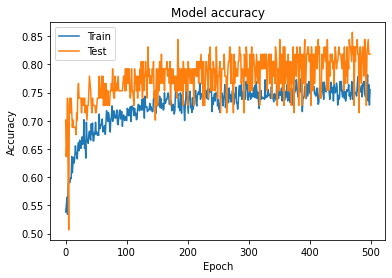

In [11]:
plt.plot(model_output.history['accuracy'])
plt.plot(model_output.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# 10. Plot training & validation loss values

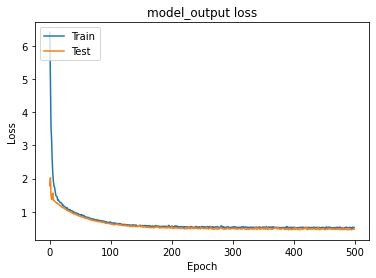

In [12]:
plt.plot(model_output.history['loss'])
plt.plot(model_output.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Do a Prediction and check the precision

In [13]:
y_pred = model.predict(x_test)
rounded = [round(x[0]) for x in y_pred]
y_pred1 = np.array(rounded,dtype='int64')

# 11. Confusion Matrix

In [14]:
confusion_matrix(y_test,y_pred1)

array([[46,  5],
       [ 9, 17]])